# Lab Case Study

## Scenario

You are working as an analyst for an auto insurance company. The company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

# Stage 1: DEFINE 

## Business Objectives = How much will this customer cost me?

* Retain customers,
* Analyze relevant customer data,
* Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

# Stage 2: GATHER

In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999

In [2]:
# In Terminal:
#### Install xlrd package to load Excel files
#### conda install openpyxl
#### conda install xlrd

In [3]:
#### Aggregate data into one Data Frame using Pandas
#### working on the original csv files recevied. the original csv files has some missing columns ( Response, Sales Channel, etc)
#### load the data & print to check if it works
#### all data are csv, if it would be text it would be('Data/file2.txt', sep = '\t')
file1 = pd.read_csv('Data/file1.csv')
file2 = pd.read_csv('Data/file2.csv')
file3 = pd.read_csv('Data/file3.csv')

In [4]:
##### Standardize Header Names
##### Before concatinating to avoid having to do lamda and .iloc later 
print(file1.columns) # before
cols = []
for i in range(len(file1.columns)):
    cols.append(file1.columns[i].lower().replace(' ', '_'))
file1.columns = cols
print(file1.columns) # after

print(file2.columns) # before
cols = []
for i in range(len(file2.columns)):
    cols.append(file2.columns[i].lower().replace(' ', '_'))
file2.columns = cols
print(file2.columns) # after

print(file3.columns) # before
cols = []
for i in range(len(file3.columns)):
    cols.append(file3.columns[i].lower().replace(' ', '_'))
file3.columns = cols
print(file3.columns) # after
file3 = file3.rename(columns={'state':'st'})

### Rearrange the columns in the data as needed
file2 = file2[file1.columns]
file2.head()

file3 = file3[file1.columns]
file3.head()

Index(['Customer', 'ST', 'GENDER', 'Education', 'Customer Lifetime Value',
       'Income', 'Monthly Premium Auto', 'Number of Open Complaints',
       'Policy Type', 'Vehicle Class', 'Total Claim Amount'],
      dtype='object')
Index(['customer', 'st', 'gender', 'education', 'customer_lifetime_value',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'policy_type', 'vehicle_class', 'total_claim_amount'],
      dtype='object')
Index(['Customer', 'ST', 'GENDER', 'Education', 'Customer Lifetime Value',
       'Income', 'Monthly Premium Auto', 'Number of Open Complaints',
       'Total Claim Amount', 'Policy Type', 'Vehicle Class'],
      dtype='object')
Index(['customer', 'st', 'gender', 'education', 'customer_lifetime_value',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'total_claim_amount', 'policy_type', 'vehicle_class'],
      dtype='object')
Index(['Customer', 'State', 'Customer Lifetime Value', 'Education', 'Gender',
      

,customer,st,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,SA25987,Washington,M,High School or Below,3479.137523,0,104,0,Personal Auto,Two-Door Car,499.200000
1,TB86706,Arizona,M,Master,2502.637401,0,66,0,Personal Auto,Two-Door Car,3.468912
2,ZL73902,Nevada,F,Bachelor,3265.156348,25820,82,0,Personal Auto,Four-Door Car,393.600000
3,KX23516,California,F,High School or Below,4455.843406,0,121,0,Personal Auto,SUV,699.615192
4,FN77294,California,M,High School or Below,7704.958480,30366,101,2,Personal Auto,SUV,484.800000


In [5]:
### Concatenate the three customers_dfframes, merge into one Data Frame using Concat
### Reset Index - This comes handy when index is need to be used as a column. drop
### After standarizing the columns at the start, gender that was duplicated is removed 
### Create a data frame with all the data merge 
column_names = file1.columns
column_names

customers_df = pd.DataFrame(columns=column_names)
customers_df

customers_df = pd.concat([customers_df,file1, file2, file3], axis=0).reset_index(drop=True)
customers_df.shape

(12074, 11)

In [6]:
## Removing duplicates
## Dropping duplicated across all columns 
## For dropping duplicates across a subset of columns = customers_df.drop_duplicates(subset=["gender", "education", "policy type", "vehicle class"])
## Len function to count 
## actually changes the dataset (and returns no output)
len(customers_df)
customers_df = customers_df.drop_duplicates()

In [7]:
customers_df['gender'].unique()  # check the unique elements in the column
# Check value in an array
# Now define a function to clean the column
# Standarize GENDER and Gender problem 
def clean(x):
    if x!= x: return "U"
    if x in ['M', 'MALE']:
        return 'Male'
    elif x.startswith('F'):
        return 'Female'
    else:
        return 'U'
customers_df['gender'] = list(map(clean, customers_df['gender']))
customers_df['gender'].unique()  # To check the results again


array(['U', 'Female', 'Male'], dtype=object)

In [8]:
customers_df

,customer,st,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,U,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,Female,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,Female,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,Male,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,Male,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
12069,LA72316,California,Male,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,PK87824,California,Female,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,TD14365,California,Male,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,UP19263,California,Male,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [9]:
#To simply have the top 5 arguments (0-4 index) of the Data Frame use .head()
customers_df.head()

,customer,st,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,U,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,Female,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,Female,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,Male,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,Male,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


### Working with new csv file name Data_Marketing_Customer_Analysis_Round2.csv that has Response and Sales Channel

In [10]:
def load_original_data():
    return pd.read_csv("Data/Data_Marketing_Customer_Analysis_Round2.csv" )

# Stage 3: CLEAN

In [11]:
def clean_data(df): 
    ### Standarizing header names 
    ### If there are no duplicated columns, standarizing goes in second place 
    ### Lower case, replace spaces with underscore
    df.columns=[e.lower().replace(' ', '_') for e in df.columns]
    ### Deleating & Rearranging Columns
    ### Deleating colums: argument being the column wanting to be deleated 
    ### Column customer is only a unique identifier for each row of the data, hence not helping us understand more the customer
    df=df.drop(columns=['unnamed:_0', 'vehicle_type',"customer"])
    df=df.dropna()
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
    df["month"]=list(map(lambda date:date.strftime(format="%B"),df["effective_to_date"]))
    return df

In [12]:
def transform(df):
    df=df[df['income']>0]
    df["total_claim_amount"]=round(df["total_claim_amount"],0)
    df["customer_lifetime_value"]=round(df["customer_lifetime_value"],0)
    ### Filtering data and Correcting typos 
    ### Filter the data in vehicle class and policy columns to standardize the texts in those columns
    ### Bucketing / Grouping the data to reduce the dimension and reduce model complexity
    ### Remove 11 dimensions 
    df.vehicle_class[customers_df.vehicle_class.isin(["Luxury Car","Luxury SUV"])] = "Luxury Car"
    df.vehicle_class[customers_df.vehicle_class.isin(["Four-Door Car","SUV"])] = "Four-Door Car"
    df.policy[df.policy.isin(["Personal L3","Personal L2","Personal L1"]) ] = "Personal"
    df.policy[df.policy.isin(["Corporate L3","Corporate L2","Corporate L1"]) ] = "Corporate"
    df.policy[df.policy.isin(["Special L3","Special L2","Special L1"]) ] = "Special"
    df=df.drop(columns=["month","education"])
    df.number_of_policies[df.number_of_policies>2]=3
    return df

In [13]:
customers_df=load_original_data()
customers_df=clean_data(customers_df)
customers_df=transform(customers_df)

<ipython-input-12-eb319922096b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_claim_amount"]=round(df["total_claim_amount"],0)
<ipython-input-12-eb319922096b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["customer_lifetime_value"]=round(df["customer_lifetime_value"],0)
<ipython-input-12-eb319922096b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [14]:
customers_df.vehicle_class.value_counts()

Four-Door Car    4771
Two-Door Car     1433
Sports Car        355
Luxury Car        258
Name: vehicle_class, dtype: int64

In [15]:
customers_df.shape

(6817, 22)

In [16]:
customers_df.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage',
       'effective_to_date', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [17]:
### To simply have the top 5 arguments (0-4 index) of the Data Frame use .head()
customers_df.head()

,state,customer_lifetime_value,response,coverage,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Arizona,4809.0,No,Basic,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,3,Corporate Auto,Corporate,Offer3,Agent,293.0,Four-Door Car,Medsize
2,Washington,14948.0,No,Basic,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal,Offer3,Call Center,480.0,Four-Door Car,Medsize
3,Oregon,22332.0,Yes,Extended,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate,Offer2,Branch,484.0,Four-Door Car,Medsize
6,California,5035.0,No,Basic,2011-02-14,Employed,F,37405,Urban,Married,63,8.0,99,3.0,3,Corporate Auto,Corporate,Offer2,Branch,288.0,Four-Door Car,Medsize
7,California,4956.0,No,Basic,2011-02-24,Employed,M,87197,Urban,Single,63,35.0,45,0.0,3,Personal Auto,Personal,Offer2,Branch,247.0,Two-Door Car,Medsize


In [18]:
### To simply have the last 5 arguments (0-4 index) of the Data Frame use .tail()
customers_df.tail()

,state,customer_lifetime_value,response,coverage,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
10902,California,3579.0,No,Extended,2011-01-24,Employed,F,28304,Suburban,Married,91,10.0,30,2.0,1,Personal Auto,Personal,Offer2,Agent,655.0,Four-Door Car,Medsize
10903,Arizona,2772.0,No,Basic,2011-01-07,Employed,M,59855,Suburban,Married,74,30.0,82,4.0,1,Personal Auto,Personal,Offer2,Branch,355.0,Two-Door Car,Medsize
10906,Oregon,5259.0,No,Basic,2011-01-06,Employed,F,61146,Urban,Married,65,7.0,68,0.0,3,Personal Auto,Personal,Offer2,Branch,273.0,Four-Door Car,Medsize
10907,Arizona,23893.0,No,Extended,2011-02-06,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate,Offer1,Web,381.0,Luxury Car,Medsize
10908,California,11972.0,No,Premium,2011-02-13,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,3,Personal Auto,Personal,Offer1,Branch,618.0,Four-Door Car,Medsize


In [19]:
## Replacing / imputing null values
## hk_df.isna().sum()
## hk_df.isna().sum()/len(hk_df)
## Dropping columns with more null values
## Removing outliers
## It is shown as nan, technically a string should ‘null’ or ‘none’ and number as nan’ 
nulls_df = pd.DataFrame(round(customers_df.isna().sum()/len(customers_df),4)*100) # shows the percentage of null values in a column
# Reset Index as a column 
nulls_df = nulls_df.reset_index()
# Name the columns 
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

### Imputing the missing values, replacing them
### Decide case by case and come up with the best strategy to fill them 
### Numerical columns: Some ways to approach the problem
### Ignore these observations
### Replace with general average (Mean or Median)
### Replace with similar type of averages
### Build model to predict missing values (ML)

,header_name,percent_nulls
0,state,0.0
1,customer_lifetime_value,0.0
2,response,0.0
3,coverage,0.0
4,effective_to_date,0.0
5,employmentstatus,0.0
6,gender,0.0
7,income,0.0
8,location_code,0.0
9,marital_status,0.0


,state,region,customer_lifetime_value,response,coverage,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Arizona,Central,4809.0,No,Basic,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,3,Corporate Auto,Corporate,Offer3,Agent,293.0,Four-Door Car,Medsize
2,Washington,East,14948.0,No,Basic,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal,Offer3,Call Center,480.0,Four-Door Car,Medsize
3,Oregon,North West,22332.0,Yes,Extended,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate,Offer2,Branch,484.0,Four-Door Car,Medsize
6,California,West Region,5035.0,No,Basic,2011-02-14,Employed,F,37405,Urban,Married,63,8.0,99,3.0,3,Corporate Auto,Corporate,Offer2,Branch,288.0,Four-Door Car,Medsize
7,California,West Region,4956.0,No,Basic,2011-02-24,Employed,M,87197,Urban,Single,63,35.0,45,0.0,3,Personal Auto,Personal,Offer2,Branch,247.0,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,California,West Region,3579.0,No,Extended,2011-01-24,Employed,F,28304,Suburban,Married,91,10.0,30,2.0,1,Personal Auto,Personal,Offer2,Agent,655.0,Four-Door Car,Medsize
10903,Arizona,Central,2772.0,No,Basic,2011-01-07,Employed,M,59855,Suburban,Married,74,30.0,82,4.0,1,Personal Auto,Personal,Offer2,Branch,355.0,Two-Door Car,Medsize
10906,Oregon,North West,5259.0,No,Basic,2011-01-06,Employed,F,61146,Urban,Married,65,7.0,68,0.0,3,Personal Auto,Personal,Offer2,Branch,273.0,Four-Door Car,Medsize
10907,Arizona,Central,23893.0,No,Extended,2011-02-06,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate,Offer1,Web,381.0,Luxury Car,Medsize


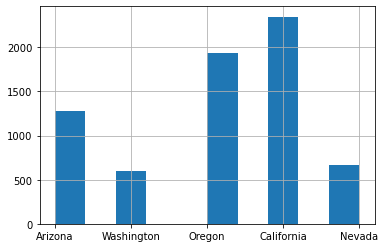

In [20]:
### Bucketing the data / Creating groups of data 
### Write a function to replace column "State" to different zones. 
### California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central
customers_df['state'].describe()
customers_df.state.hist()
# First create a function for the region, else Central as there are 2 values 
# Name of the function, conditions
def region(x): 
    if x == "California":
        return "West Region"
    elif x == "Oregon":
        return "North West"
    elif x == "Washington":
        return "East"
    else: 
        return "Central"
#Map has 2 inputs, the function that is the region & state (the column where you want to apply the map)
customers_df.insert(1, "region", list(map(region, customers_df['state'])))
customers_df

In [21]:
### Which columns are numerical?
### There is a function to identify numeric data directly 
customers_df._get_numeric_data()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.0,48029,61,7.0,52,0.0,3,293.0
2,14948.0,22139,100,34.0,31,0.0,2,480.0
3,22332.0,49078,97,10.0,3,0.0,2,484.0
6,5035.0,37405,63,8.0,99,3.0,3,288.0
7,4956.0,87197,63,35.0,45,0.0,3,247.0
...,...,...,...,...,...,...,...,...
10902,3579.0,28304,91,10.0,30,2.0,1,655.0
10903,2772.0,59855,74,30.0,82,4.0,1,355.0
10906,5259.0,61146,65,7.0,68,0.0,3,273.0
10907,23893.0,39837,201,11.0,63,0.0,2,381.0


# Stage 4: EXPLORE

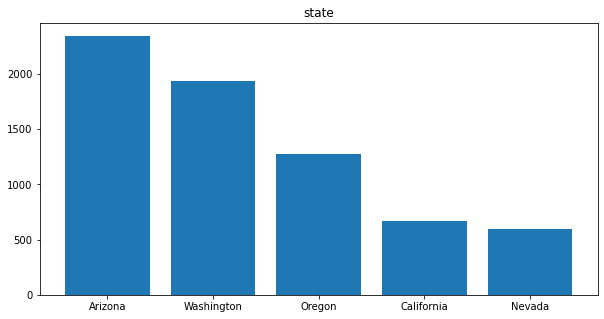

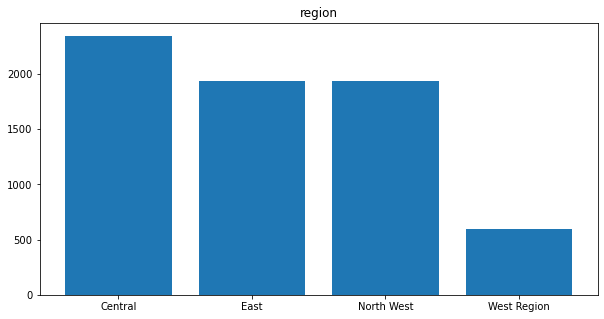

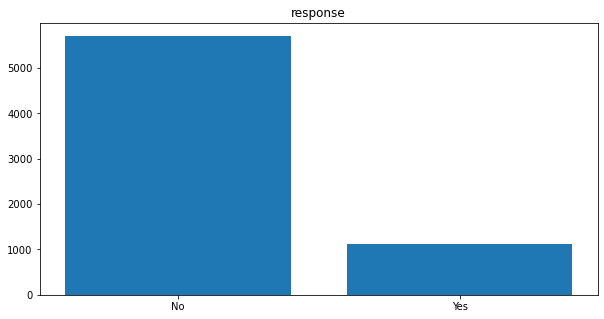

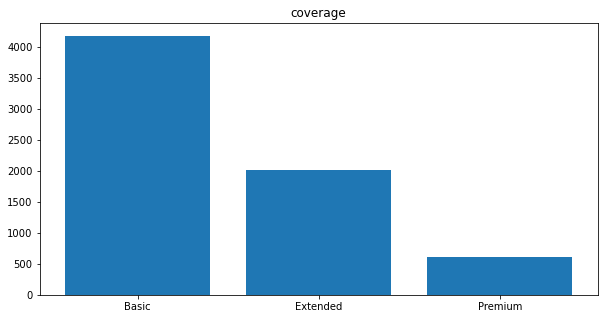

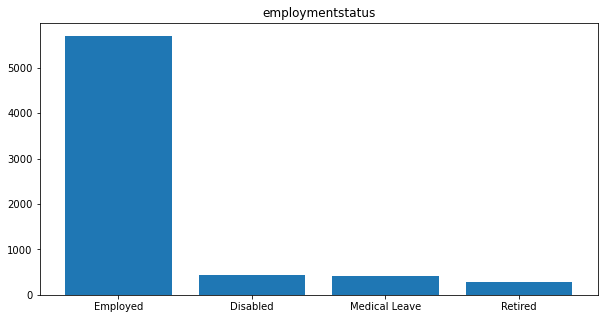

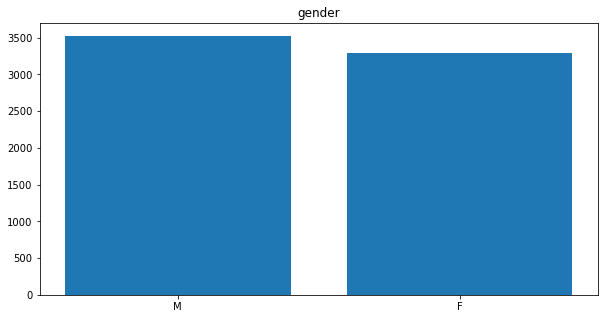

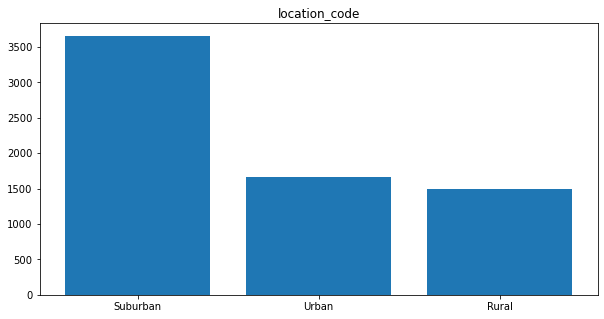

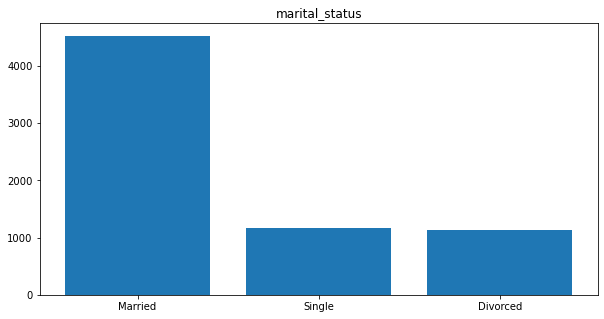

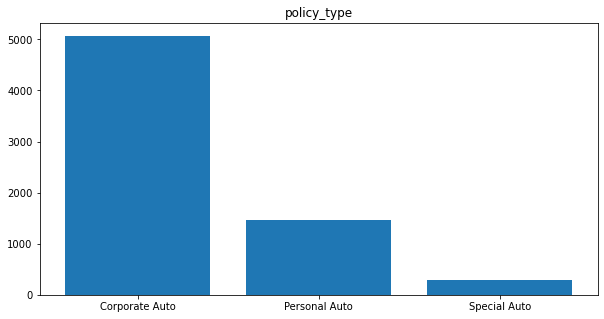

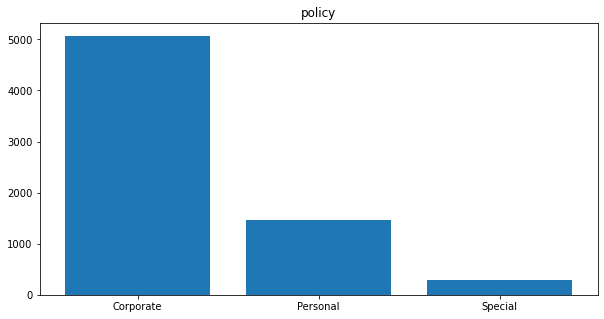

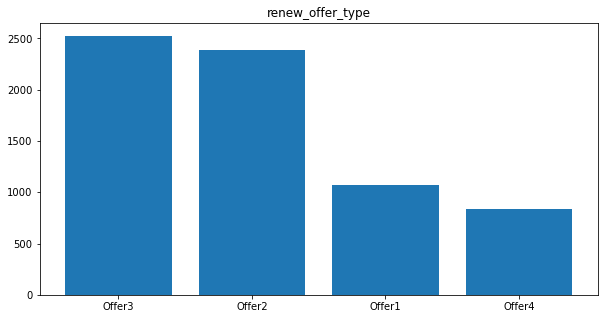

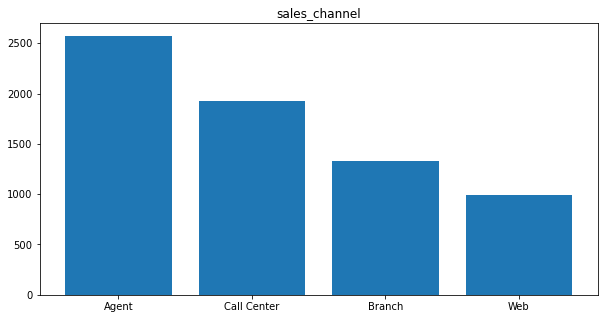

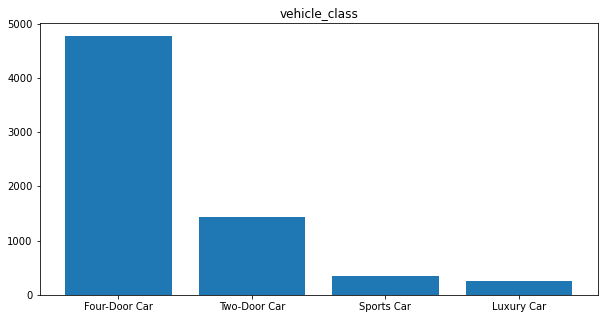

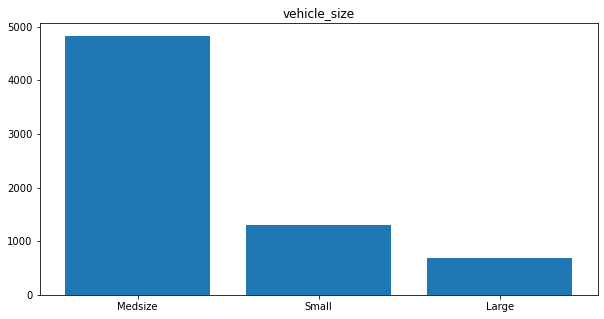

In [22]:
### Plot the responses of all columns in df
### Check all histograms 
for c in customers_df.select_dtypes(object):
    plt.figure(figsize=(10,5))
    plt.bar(customers_df[c].unique(), customers_df[c].value_counts())
    plt.title(c)
    plt.show();

array([<AxesSubplot:title={'center':'No'}>,
       <AxesSubplot:title={'center':'Yes'}>], dtype=object)

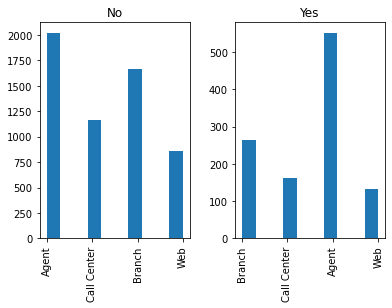

In [23]:
### plot of the response rate by the sales channel.
customers_df.hist(by='response',
       column='sales_channel')

<AxesSubplot:xlabel='response', ylabel='count'>

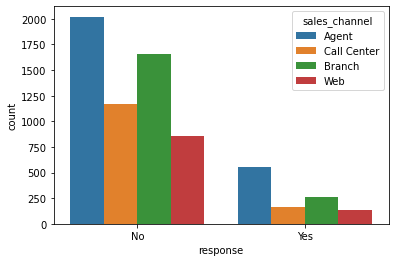

In [24]:
# Use hue to breaks it down in colours 
sns.countplot(data=customers_df, x='response', hue='sales_channel')

In [25]:
response_rate = customers_df['response'].value_counts()
response_rate

No     5707
Yes    1110
Name: response, dtype: int64

<AxesSubplot:xlabel='response', ylabel='count'>

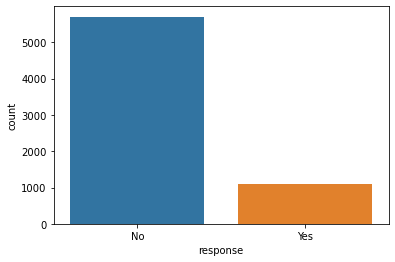

In [26]:
sns.countplot(data=customers_df, x='response')

<AxesSubplot:xlabel='response', ylabel='total_claim_amount'>

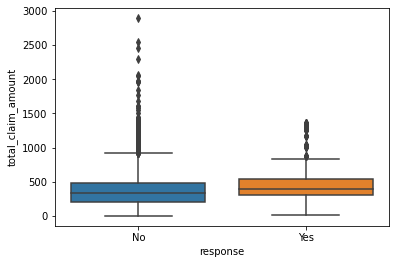

In [27]:
### Plot response rate by total claim amount
### A boxplot summarizes the distribution of a numeric variable for one or several groups. 
sns.boxplot( x=customers_df["response"], y=customers_df["total_claim_amount"] )

<AxesSubplot:xlabel='response', ylabel='total_claim_amount'>

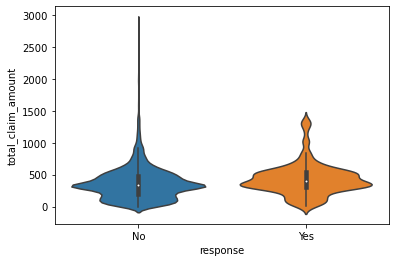

In [28]:
### Violin plots are similar to box plots
### Except that they also show the probability density of the data at different values
sns.violinplot(x=customers_df["response"], y=customers_df["total_claim_amount"])

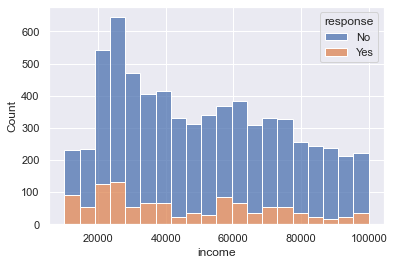

In [29]:
### Plot the response rate by the income
### Stack the bars to make them more visible 
### Histogram is used to summarize discrete or continuous data that are measured on an interval scale.
sns.set_theme(style="darkgrid")
ax2 = sns.histplot(hue='response', x='income', data=customers_df, bins=20, multiple='stack')

<AxesSubplot:title={'center':'total claim amount by income'}, xlabel='total_claim_amount', ylabel='income'>

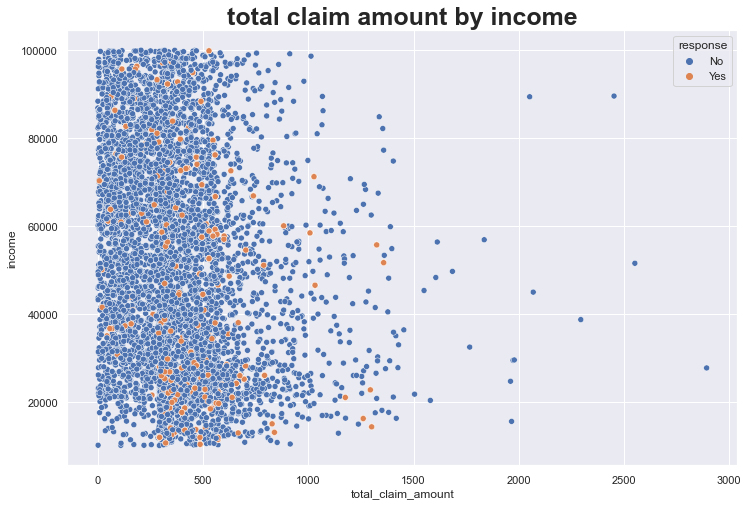

In [30]:
### Total claim amount, by income, hue response rate 
### The graph shows if we wanted to build a prediction model, income and total claim amount not good predictors
fig3, ax3 = plt.subplots(figsize = (12,8))
ax3.set_title('total claim amount by income', size='25', fontweight='bold')
sns.scatterplot(data=customers_df, x='total_claim_amount', y='income', hue='response')

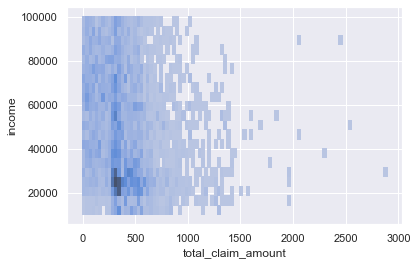

In [31]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
sns.histplot(data=customers_df, x="total_claim_amount", y="income")
plt.show()

/Users/carlacolomer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_claim_amount'>

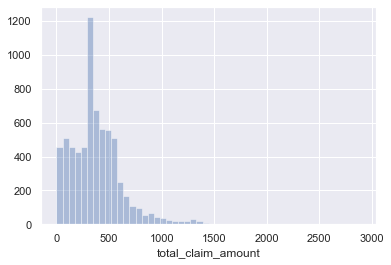

In [32]:
### Plot the histogram thanks to the distplot function
### Normal distribution sckewed to the left
sns.distplot( a=customers_df["total_claim_amount"], hist=True, kde=False, rug=False )

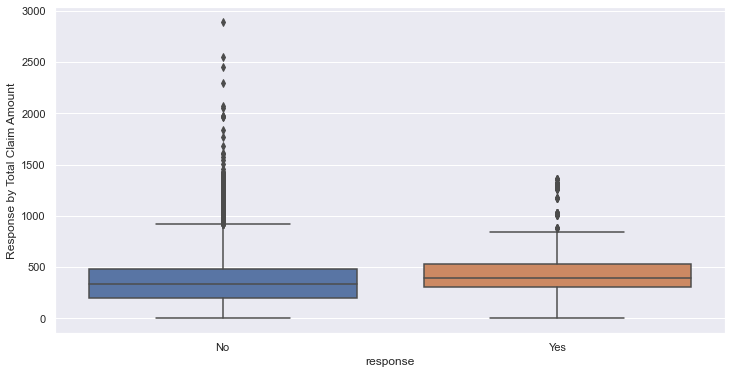

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(y="total_claim_amount" , x="response", data=customers_df)
plt.ylabel('Response by Total Claim Amount')
plt.show()

# Data Transformation 

### Check normality visually 

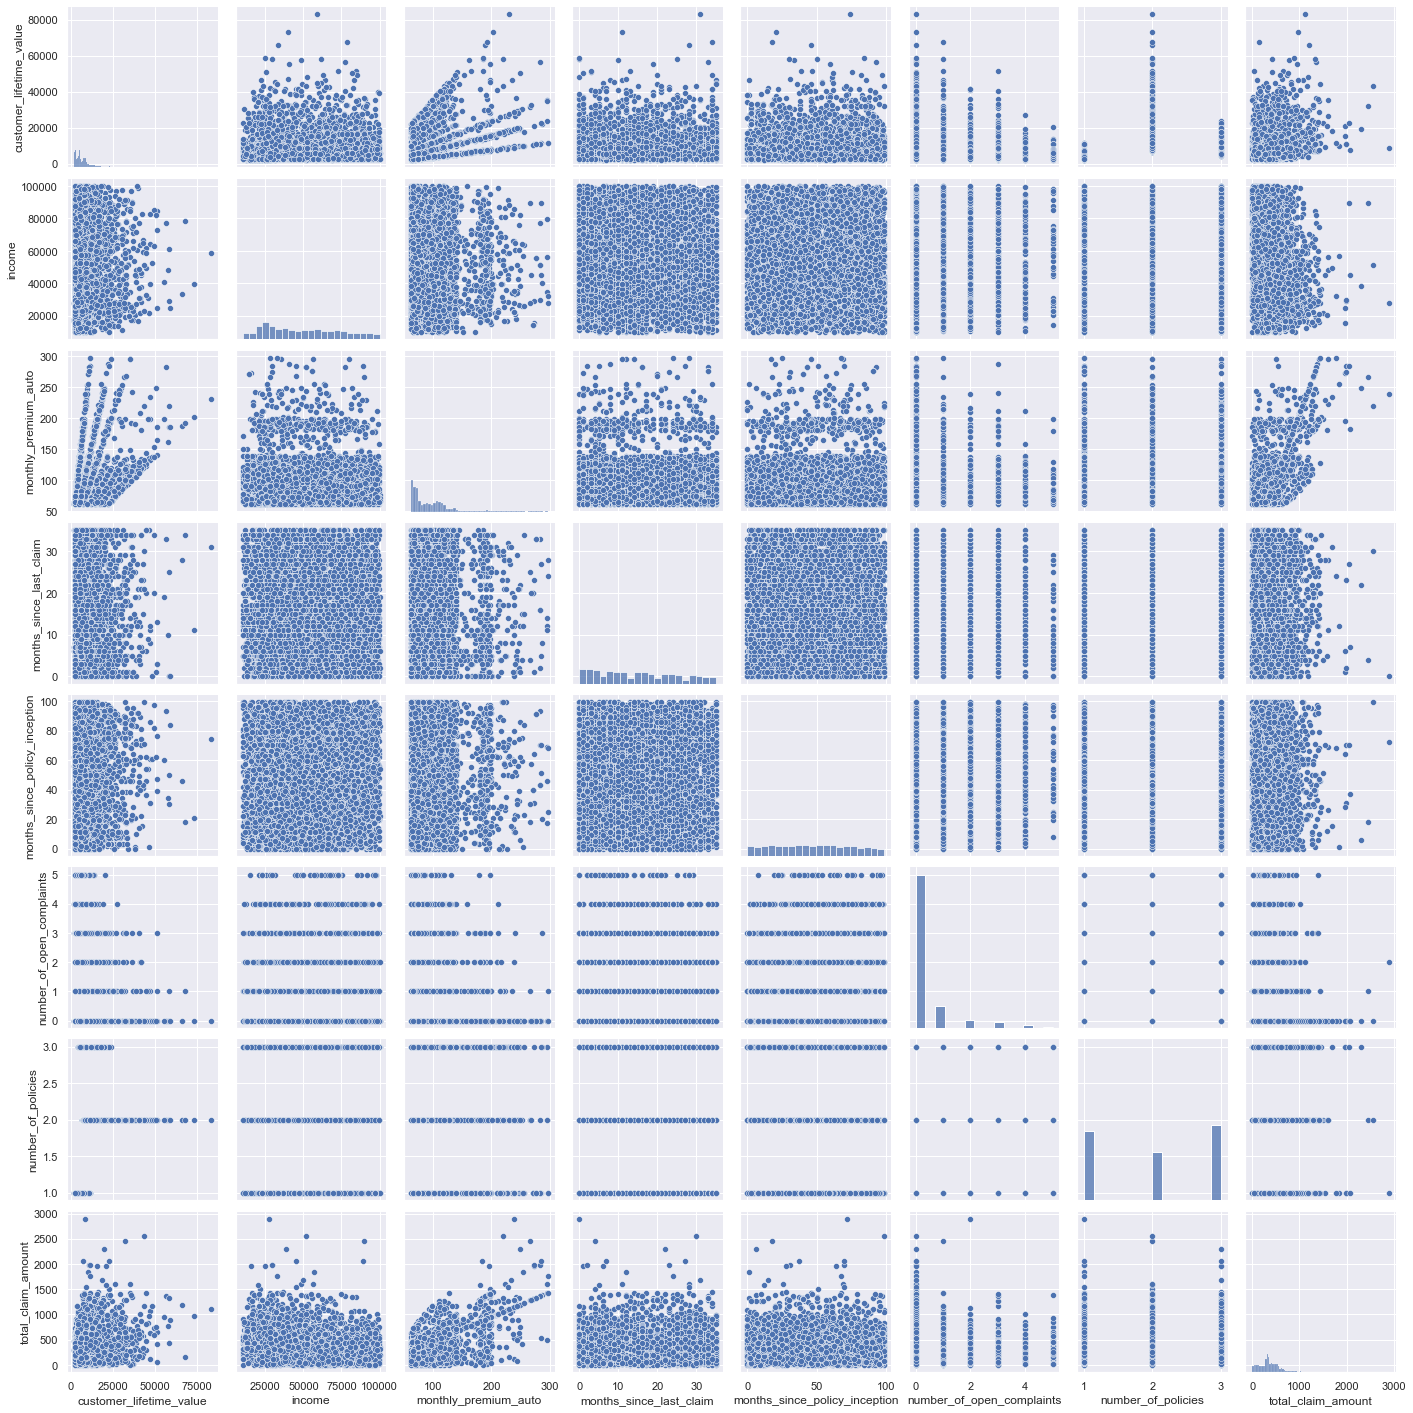

In [34]:
sns.pairplot(customers_df)
plt.show()

/Users/carlacolomer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

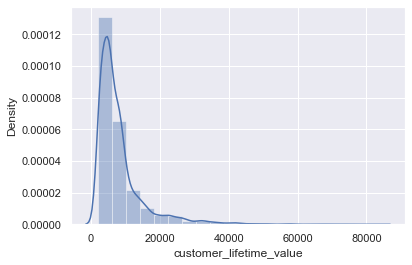

In [35]:
sns.distplot((customers_df['customer_lifetime_value']), bins=20)

In [36]:
# Normal distribution but its sckewed 
# Hopefully it becomes a normal distribution after doing boxcox
# We are trying to make it perfect for the model to work
monthly=boxcox(customers_df['customer_lifetime_value'],lmbda=-0.04)

<AxesSubplot:ylabel='Count'>

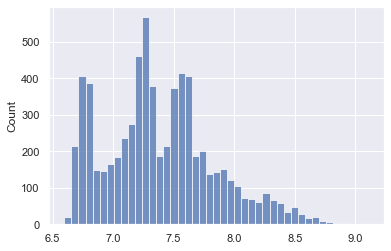

In [37]:
sns.histplot(monthly)

/Users/carlacolomer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monthly_premium_auto', ylabel='Density'>

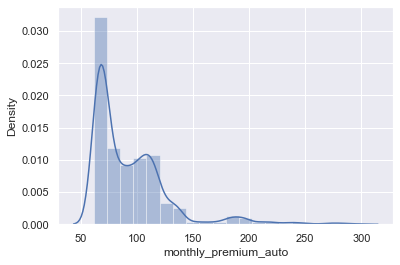

In [38]:
sns.distplot((customers_df['monthly_premium_auto']), bins=20)

#### Checking Multicorrelinilaty

                               customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.002916   
income                                        0.002916  1.000000   
monthly_premium_auto                          0.399491 -0.012372   
months_since_last_claim                       0.018531 -0.034453   
months_since_policy_inception                 0.011275  0.015799   
number_of_open_complaints                    -0.025038  0.016642   
number_of_policies                            0.202484  0.009224   
total_claim_amount                            0.245436 -0.221917   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.399491                 0.018531   
income                                    -0.012372                -0.034453   
monthly_premium_auto                       1.000000                 0.005887   
months_since_last_claim                    0.005887                

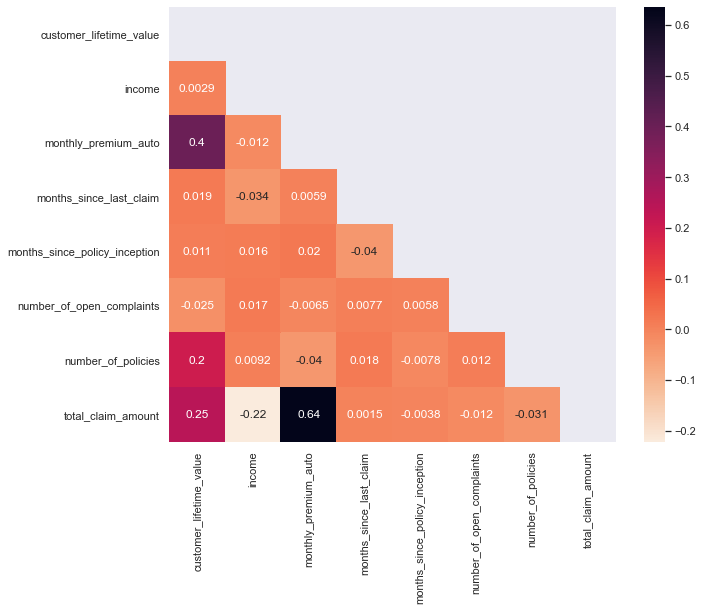

In [39]:
numericals_features=customers_df._get_numeric_data()
correlations = numericals_features.corr()
print(correlations)
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(numericals_features.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(numericals_features.corr(), mask=mask, annot=True,cmap=cmap)
plt.show()

In [40]:
### Highly Correlated Columns
### To check the linearity of the relationship between the dependent feature and the independent feature, check: correlation matrix.
### The higher ( in absolute value ) the value of the correlation, the better. 
### A minimum to consider a good correlation value is 0.75, but there is no consensus. 
corr_matrix=customers_df.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.20)]

['monthly_premium_auto', 'number_of_policies', 'total_claim_amount']

In [41]:
### dropping highly correlated features
customers_df.drop(["monthly_premium_auto", "number_of_policies"],axis=1,inplace=True)

In [42]:
customers_df

,state,region,customer_lifetime_value,response,coverage,effective_to_date,employmentstatus,gender,income,location_code,marital_status,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Arizona,Central,4809.0,No,Basic,2011-02-18,Employed,M,48029,Suburban,Married,7.0,52,0.0,Corporate Auto,Corporate,Offer3,Agent,293.0,Four-Door Car,Medsize
2,Washington,East,14948.0,No,Basic,2011-02-10,Employed,M,22139,Suburban,Single,34.0,31,0.0,Personal Auto,Personal,Offer3,Call Center,480.0,Four-Door Car,Medsize
3,Oregon,North West,22332.0,Yes,Extended,2011-01-11,Employed,M,49078,Suburban,Single,10.0,3,0.0,Corporate Auto,Corporate,Offer2,Branch,484.0,Four-Door Car,Medsize
6,California,West Region,5035.0,No,Basic,2011-02-14,Employed,F,37405,Urban,Married,8.0,99,3.0,Corporate Auto,Corporate,Offer2,Branch,288.0,Four-Door Car,Medsize
7,California,West Region,4956.0,No,Basic,2011-02-24,Employed,M,87197,Urban,Single,35.0,45,0.0,Personal Auto,Personal,Offer2,Branch,247.0,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,California,West Region,3579.0,No,Extended,2011-01-24,Employed,F,28304,Suburban,Married,10.0,30,2.0,Personal Auto,Personal,Offer2,Agent,655.0,Four-Door Car,Medsize
10903,Arizona,Central,2772.0,No,Basic,2011-01-07,Employed,M,59855,Suburban,Married,30.0,82,4.0,Personal Auto,Personal,Offer2,Branch,355.0,Two-Door Car,Medsize
10906,Oregon,North West,5259.0,No,Basic,2011-01-06,Employed,F,61146,Urban,Married,7.0,68,0.0,Personal Auto,Personal,Offer2,Branch,273.0,Four-Door Car,Medsize
10907,Arizona,Central,23893.0,No,Extended,2011-02-06,Employed,F,39837,Rural,Married,11.0,63,0.0,Corporate Auto,Corporate,Offer1,Web,381.0,Luxury Car,Medsize


### Predictive Modeling

### X,Y Split

In [43]:
# Splitting the Data-set into Independent and Dependent Features
Y = customers_df['total_claim_amount']
X = customers_df.drop(columns='total_claim_amount')
Y
X

,state,region,customer_lifetime_value,response,coverage,effective_to_date,employmentstatus,gender,income,location_code,marital_status,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Arizona,Central,4809.0,No,Basic,2011-02-18,Employed,M,48029,Suburban,Married,7.0,52,0.0,Corporate Auto,Corporate,Offer3,Agent,Four-Door Car,Medsize
2,Washington,East,14948.0,No,Basic,2011-02-10,Employed,M,22139,Suburban,Single,34.0,31,0.0,Personal Auto,Personal,Offer3,Call Center,Four-Door Car,Medsize
3,Oregon,North West,22332.0,Yes,Extended,2011-01-11,Employed,M,49078,Suburban,Single,10.0,3,0.0,Corporate Auto,Corporate,Offer2,Branch,Four-Door Car,Medsize
6,California,West Region,5035.0,No,Basic,2011-02-14,Employed,F,37405,Urban,Married,8.0,99,3.0,Corporate Auto,Corporate,Offer2,Branch,Four-Door Car,Medsize
7,California,West Region,4956.0,No,Basic,2011-02-24,Employed,M,87197,Urban,Single,35.0,45,0.0,Personal Auto,Personal,Offer2,Branch,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,California,West Region,3579.0,No,Extended,2011-01-24,Employed,F,28304,Suburban,Married,10.0,30,2.0,Personal Auto,Personal,Offer2,Agent,Four-Door Car,Medsize
10903,Arizona,Central,2772.0,No,Basic,2011-01-07,Employed,M,59855,Suburban,Married,30.0,82,4.0,Personal Auto,Personal,Offer2,Branch,Two-Door Car,Medsize
10906,Oregon,North West,5259.0,No,Basic,2011-01-06,Employed,F,61146,Urban,Married,7.0,68,0.0,Personal Auto,Personal,Offer2,Branch,Four-Door Car,Medsize
10907,Arizona,Central,23893.0,No,Extended,2011-02-06,Employed,F,39837,Rural,Married,11.0,63,0.0,Corporate Auto,Corporate,Offer1,Web,Luxury Car,Medsize


### Normalise (Numerical)

In [44]:
X=X._get_numeric_data()
X

,customer_lifetime_value,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints
0,4809.0,48029,7.0,52,0.0
2,14948.0,22139,34.0,31,0.0
3,22332.0,49078,10.0,3,0.0
6,5035.0,37405,8.0,99,3.0
7,4956.0,87197,35.0,45,0.0
...,...,...,...,...,...
10902,3579.0,28304,10.0,30,2.0
10903,2772.0,59855,30.0,82,4.0
10906,5259.0,61146,7.0,68,0.0
10907,23893.0,39837,11.0,63,0.0


### scale x

In [45]:
X_scaled=StandardScaler().fit_transform(X)
X_scaled.shape

(6817, 5)

In [46]:
X_scaled

array([[-0.47797464, -0.09988327, -0.79957495,  0.14940416, -0.4219305 ],
       [ 0.98117693, -1.16513241,  1.88324854, -0.60346471, -0.4219305 ],
       [ 2.04384338, -0.05672196, -0.50148345, -1.60728987, -0.4219305 ],
       ...,
       [-0.413213  ,  0.43981827, -0.79957495,  0.72301854, -0.4219305 ],
       [ 2.2684943 , -0.43694472, -0.40211962,  0.54376405, -0.4219305 ],
       [ 0.55288666,  0.56526997, -1.49512178, -0.7468683 ,  3.99804676]])

### One Hot/Label Encoding (categorical).

### checking the significant variables

In [47]:
model.params[list(np.where(model.pvalues < 0.05)[0])].iloc[1:].index.tolist()

NameError: name 'model' is not defined

# Modeling using Statsmodels

### Without scaling

In [48]:
X_train_const = sm.add_constant(X_train) #adding a constant

model = sm.OLS(y_train, X_train_const).fit()
predicitions_train = model.predict(X_train_const)

X_test_const = sm.add_constant(X_test) #adding a constant
predicitions_test = model.predict(X_test_const)
print_model = model.summary()
print(print_model)

NameError: name 'X_train' is not defined

### Categorical Variables Transformation

In [49]:
categoricals_features=pd.dummies(categoric)

AttributeError: module 'pandas' has no attribute 'dummies'

# Supervised ML: Linear Regression

### Train-test split

In [50]:
X_train, X_test, Y_train, Y_test=train_test_split(X_scaled, Y, test_size=.20)

In [51]:
X_train

array([[-0.4483282 , -0.07774716, -0.30275578, -1.17707909, -0.4219305 ],
       [-0.52172472,  1.25996546, -0.40211962, -1.53558808, -0.4219305 ],
       [-0.81459122, -1.3082354 , -0.20339195,  0.93812393, -0.4219305 ],
       ...,
       [-0.47121064, -1.08243056, -0.00466428, -1.35633358, -0.4219305 ],
       [ 1.52575031,  0.81181199, -1.09766644,  0.47206225, -0.4219305 ],
       [-0.49984968, -0.87995505, -0.70021111,  1.8343964 ,  1.78805813]])

### Apply Linear Regression

In [52]:
### Model fitting
model=LinearRegression()    # model
model.fit(X_train, Y_train)   # model train

LinearRegression()

In [53]:
### Making prediction
Y_pred=model.predict(X_test)   # model prediction
##y_pred_train=model.predict(X_train)
Y_pred

array([367.48857079, 367.08842327, 410.02898907, ..., 234.18803571,
       460.25046497, 391.6063458 ])

In [54]:
result=pd.DataFrame({"y_test":Y_test,"y_pred":Y_pred})

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

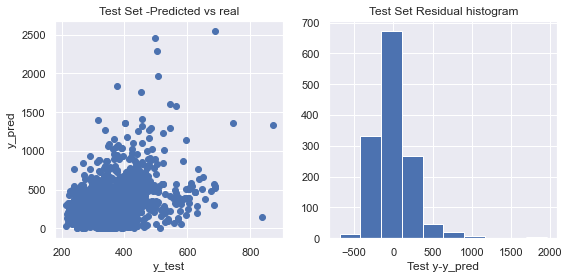

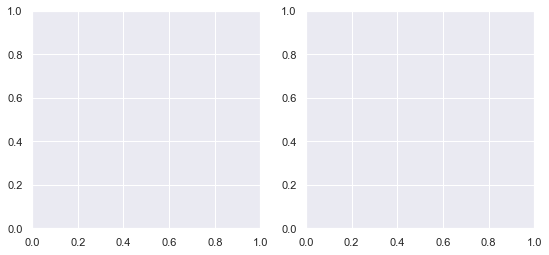

In [55]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,2,figsize=(9,4))
ax[0].plot(Y_pred, Y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(Y_test - Y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

fig, ax = plt.subplots(1,2,figsize=(9,4))
ax[0,0].plot(Y_pred, Y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(Y_train - Y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Set Residual histogram")

ax[1,2].plot(Y_pred_train,y_train - y_pred_train, 'o')
ax[1,2].set_xlabel("predicted")
ax[1,2].set_ylabel("residuals")
ax[1,2].set_title("Residuals by Predicted -- Train set")
ax[1,2].plot(y_pred-train,np.zeros(len(y_pred_train)),linestyle='dashed')


In [56]:
Y_test

560      43.0
3879    256.0
1251    307.0
9821    701.0
6283    471.0
        ...  
3120    466.0
8417     14.0
1499    155.0
7560    358.0
1503    499.0
Name: total_claim_amount, Length: 1364, dtype: float64

In [57]:
Y_pred.tolist()

[367.4885707941857,
 367.08842327013593,
 410.02898906889607,
 501.26684725507863,
 300.74815593124805,
 314.050983837678,
 425.05609693001594,
 407.98147413371004,
 355.5164161800967,
 463.0521102090174,
 382.33324806148215,
 247.1223081255117,
 402.6769053173484,
 404.02922843989523,
 474.17685947637995,
 397.965882409628,
 487.61428397252155,
 444.6168812659987,
 439.7552942267375,
 688.1882316056276,
 428.5175789624109,
 404.1096926480193,
 418.9654549359732,
 327.2583919994819,
 319.22114985336674,
 357.2165023810179,
 348.7019923127306,
 381.76815225249237,
 545.8638054893618,
 571.5377195876488,
 362.4632828652644,
 310.9487784544297,
 417.3655562066903,
 381.898042527844,
 436.33210229070255,
 457.0545249533817,
 437.50804859328116,
 236.2442584356466,
 418.68743421470015,
 381.8436320428252,
 389.6489866963266,
 309.62184510524753,
 384.47402072761105,
 419.99176683751716,
 436.31754767203415,
 423.32326529683564,
 380.90349679077616,
 243.74412623338364,
 279.3588849980752,
 

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

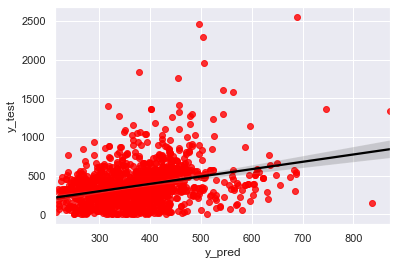

In [58]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

# Model Validation

### MSE

In [64]:
###Mean squared error: 
###Easy to minimize, the smaller the better, too sensitive to outliers in predictions
###Squared units!

### RMSE

In [63]:
###Root mean square error: 
###Not easy to minimize, the smaller the better, to sensitive to outliers in predictions
###Correct units!
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, train_mse**.5))

NameError: name 'train_mse' is not defined

### MAE

In [65]:
### Mean absolute error: 
###Not easy to minimize, the smaller the better
train_mae = mae(y_train,y_pred_train)
test_mae=mae(y_test,y_pred)

print('train MAE: {} -- test MAE'.format(train_mse, test_mse))

NameError: name 'y_train' is not defined

### R2

In [66]:
###R2 = model.score(X_test_scaled, y_test)
###Provides a measurement of the “explanatory” power of a model (shows how much variance of y can be explained by the independent features) 
###Compares the variance of your model’s errors against the “mean model” (model for which all the predictions are the mean of the dependent variable)
###Increases with every independent feature you add
###Provides a way to compare the performance of several models

R2_train = r2_score(y_train,y_pred_train)
R2_train = r2_score(y_test,y_pred)

print(R2_train)
print(R2_test)

NameError: name 'y_train' is not defined

### Adjusted R2

In [67]:
### Provides a measurement of the “explanatory” power of a model taking into account the number of independent features used by the model.
### Only increases if the inclusion of a new feature improves the model’s performance.


In [62]:
#### Write a csv

With `to_csv` 

SyntaxError: invalid syntax (<ipython-input-62-792f85df347c>, line 3)

In [ ]:
customers_df.to_csv("Data/customer_analysis_cleaned_data.csv")